# GBDT Model Training Process

## Step 1: Data Preprocessing and Identifying the 12 Most Influential Microbes and Compounds
- Preprocess the data and identify the 12 most influential microbes and compounds.
- Handle 0 values in the data and determine which compounds or microbes have higher frequencies at different sampling points.

## Step 2: Check for Missing Values
- Check for missing values based on the 12 most influential compounds and microbes across all sampling points.

## Step 3: Missing Value Imputation Methods
- Tried 5 methods for filling missing values: Linear Interpolation, Time Mean, Sample Mean, Global Mean, and Median Imputation.
- Linear Interpolation and Time Mean could not fill missing values.
- Median Imputation performed best, followed by Global Mean and Sample Mean.
- The code lists results for these three imputation methods and uses Median Imputation for filling missing values.

## Step 4: Model Building
- Used the GBR model, equivalent to the GBDT model, for training.

## Step 5: Data Splitting
- Tried 2 splitting methods: 80/20 and 70/30.
- Both methods yielded similar results, but 70/30 performed better overall.
- The code uses a 70/30 split for the dataset.

## Step 6: Evaluation Metrics
- Chose 6 evaluation metrics to comprehensively assess the model performance: MSE, RMSE, MAE, R² Score, Explained Variance Score, and Median Absolute Error.
- Visualized the results to enhance interpretability.

## Step 7: Output Results
- Evaluated the training and test sets using the 6 metrics.
- Checked for overfitting issues.

## Step 8: Enhancing Model Interpretability with SHAP
- Used SHAP to compute the SHAP values for each feature, indicating the impact of each feature on the results.

## Step 9: Version Information
- Output the Python version information used to avoid confusion due to different environments.

## NOTE ##
The code shows the full training process and the results using different parameters, which will be shown in the last part of the code.


## Step 1: Data Preprocessing and Identifying the 12 Most Influential Microbes and Compounds.

In [10]:
import pandas as pd

file_path = './2022data and 2023data.txt'
data = pd.read_csv(file_path, delimiter='\t', header=0)

# Set the first column to index.
data.set_index(data.columns[0], inplace=True)

# Delete unwanted 'Depth' line.
if 'Depth' in data.index:
    data.drop('Depth', inplace=True)
if 'Unnamed: 47' in data.columns:
    data.drop('Unnamed: 47', axis=1, inplace=True)

for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Process '0' value as NaN.
data.replace(0, pd.NA, inplace=True)
data.index = data.index.str.replace('"', '').str.strip()

# Count the number of non-null occurrences of each compound or organism, sorted by frequency of occurrence.
impactful_compounds = data.notna().sum(axis=1).sort_values(ascending=False)

# Print results, format output.
print(impactful_compounds.head(12).to_frame('Frequency').rename_axis('Compound/Microbe'))

                        Frequency
Compound/Microbe                 
EC                             65
Temp                           65
Trichloroethene                65
cis-1,2-dichloroethene         65
Sulphide                       65
Chloride                       65
1,2-dichloroethane             65
pH                             65
Er                             65
Vinyl chloride                 64
Chloroform                     64
1,1,2-trichloroethane          64


## Step 2: Check for Missing Values.

In [11]:
import pandas as pd

file_path = './2022data and 2023data.txt'
data = pd.read_csv(file_path, delimiter='\t', header=0)

# Set the first column to index.
data.set_index(data.columns[0], inplace=True)

# Delete unwanted 'Depth' line.
if 'Depth' in data.index:
    data.drop('Depth', inplace=True)
if 'Unnamed: 47' in data.columns:
    data.drop('Unnamed: 47', axis=1, inplace=True)

for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Process '0' value as NaN.
data.replace(0, pd.NA, inplace=True)
data.index = data.index.str.replace('"', '').str.strip()

# Count the number of non-null occurrences of each compound or organism, sorted by frequency of occurrence.
impactful_compounds = data.notna().sum(axis=1).sort_values(ascending=False)


# Get the names of the top 12 most influential compounds or microorganisms.
top_compounds = impactful_compounds.head(12).index

# Extract the values of these 12 compounds and microorganisms at each sampling site.
top_compounds_data = data.loc[top_compounds]

# Adjust Pandas display settings.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

# Print the values of these 12 compounds and microorganisms at each sampling site.
print(top_compounds_data.rename_axis('Compound/Microbe'))


                       BH90-04.00-170222 BP06-16.00-110322 BP07-8.00-160222  \
Compound/Microbe                                                              
EC                           4479.333333        745.666667       811.333333   
Temp                                22.0              19.3        21.533333   
Trichloroethene                    252.0              3.74            0.566   
cis-1,2-dichloroethene              22.0              1.99             1.67   
Sulphide                             0.4               9.1              1.2   
Chloride                           149.0             130.0            115.0   
1,2-dichloroethane                  16.6              8.69             95.3   
pH                              6.353333          5.823333             5.98   
Er                                 -53.7              -5.2             -2.4   
Vinyl chloride                      3.55              1.18              1.0   
Chloroform                          9.85            

## Step 3: Median Fill missing values.

In [6]:
import pandas as pd

# Loading dataset.
file_path = './2022data and 2023data.txt'
data = pd.read_csv(file_path, delimiter='\t', header=0)
data.set_index(data.columns[0], inplace=True)

# Delete the 'Depth' row and the unwanted 'Unnamed: 47' column from the dataset.
if 'Depth' in data.index:
    data.drop('Depth', inplace=True)
if 'Unnamed: 47' in data.columns:
    data.drop('Unnamed: 47', axis=1, inplace=True)

# Replace the ' ' in the index with a space.
data.index = data.index.str.replace('"', '').str.strip()

# Filter the data to only the most influential 12 compounds.
top_compounds = [
    "EC", "Temp", "Trichloroethene", "cis-1,2-dichloroethene",
    "Sulphide", "Chloride", "1,2-dichloroethane", "pH",
    "Er", "Vinyl chloride", "Chloroform", "1,1,2-trichloroethane"
]
data = data.loc[top_compounds]

# Convert all columns to numeric type.
data = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))
data.replace(0, pd.NA, inplace=True)

# Median fill.
data_median_filled = data.apply(lambda x: x.fillna(x.median()), axis=1)

# Save the filled results as a csv file and output the filled results.
#data_median_filled.to_csv('./Filled_median_Data.csv')
print("Filled_median_Data.csv saved successfully")
print("Median:\n", data_median_filled.rename_axis('Compound/Microbe'))


Filled_median_Data.csv saved successfully
Median:
                         BH90-04.00-170222  BP06-16.00-110322  \
Compound/Microbe                                               
EC                            4479.333333         745.666667   
Temp                            22.000000          19.300000   
Trichloroethene                252.000000           3.740000   
cis-1,2-dichloroethene          22.000000           1.990000   
Sulphide                         0.400000           9.100000   
Chloride                       149.000000         130.000000   
1,2-dichloroethane              16.600000           8.690000   
pH                               6.353333           5.823333   
Er                             -53.700000          -5.200000   
Vinyl chloride                   3.550000           1.180000   
Chloroform                       9.850000           0.989000   
1,1,2-trichloroethane            2.460000           0.141000   

                        BP07-8.00-160222  BP34-06.00

## Step 4 - 8: Includes Model Building, Data Splitting, Evaluation Metrics, Output Results, and Application SHAP.

Training Performance:
Mean Squared Error: 1.93046394745934e-09
Root Mean Squared Error: 4.393704527456688e-05
Mean Absolute Error: 3.6981520461276673e-05
R² Score: 0.9999999989222327
Explained Variance Score: 0.9999999989222327
Median Absolute Error: 3.232334711533724e-05

Testing Performance:
Mean Squared Error: 0.281074304609897
Root Mean Squared Error: 0.5301644128097406
Mean Absolute Error: 0.3436757342454917
R² Score: 0.9165040359490199
Explained Variance Score: 0.9515906998702046
Median Absolute Error: 0.15757365906886456


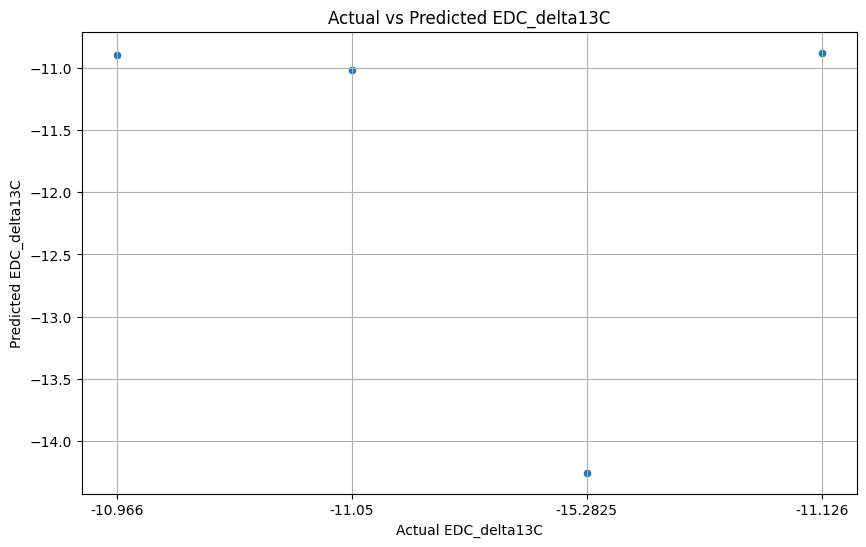

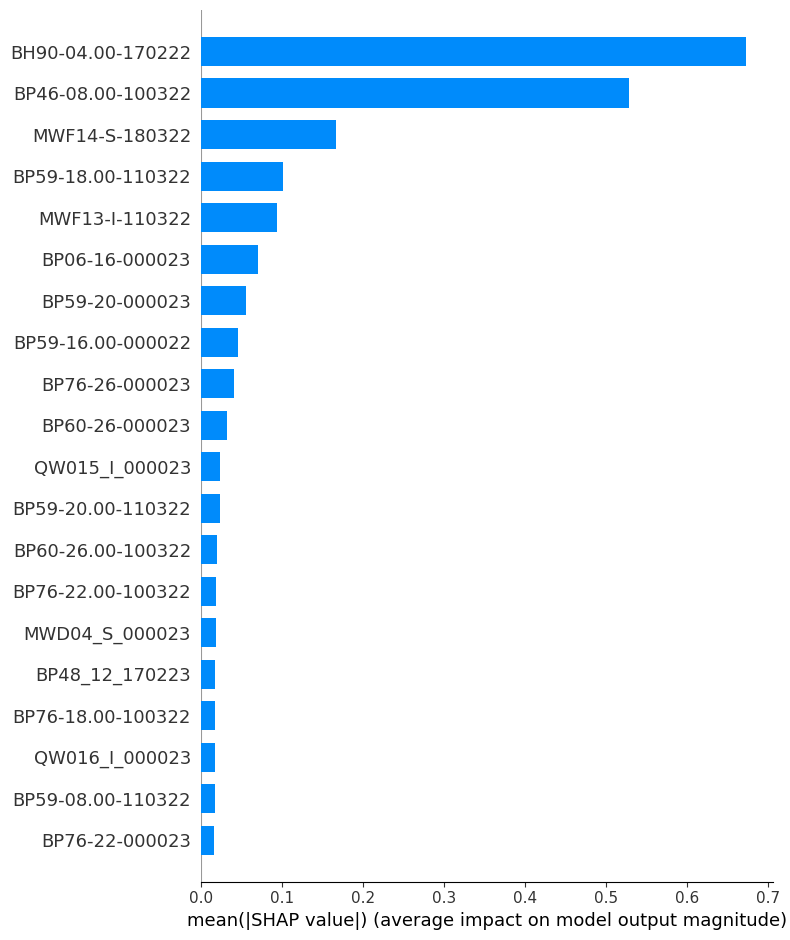

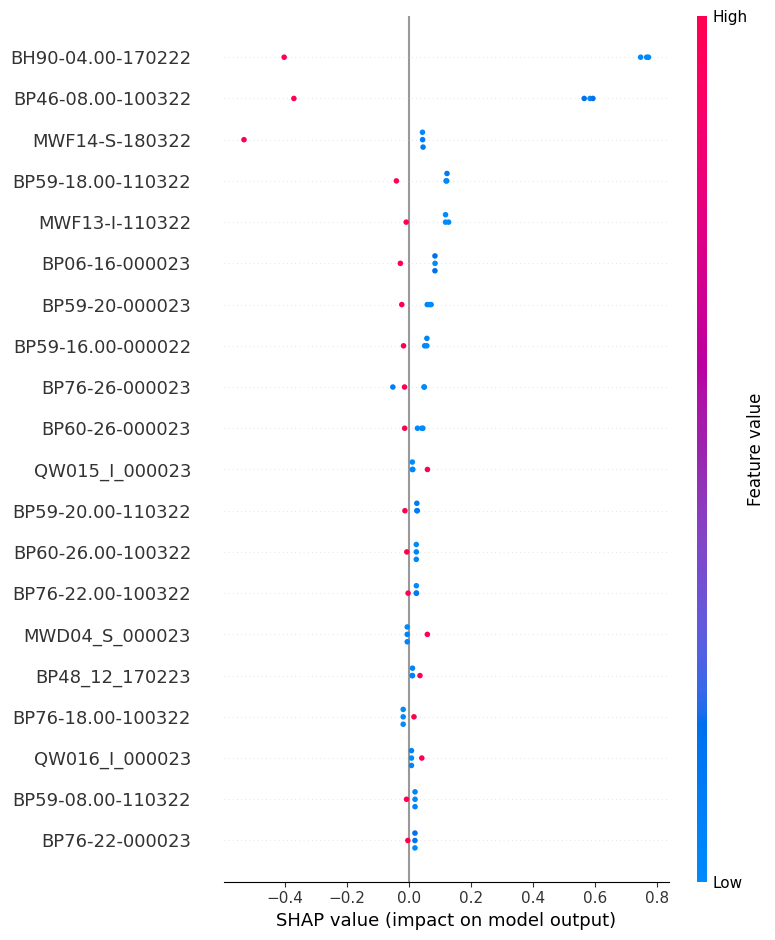

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Loading dataset.
data_file_path = './2022data and 2023data.txt'
data = pd.read_csv(data_file_path, delimiter='\t', header=0)
data.set_index(data.columns[0], inplace=True)

# Clean up X data.
if 'Depth' in data.index:
    data.drop('Depth', inplace=True)
if 'Unnamed: 47' in data.columns:
    data.drop('Unnamed: 47', axis=1, inplace=True)
data.index = data.index.str.replace('"', '').str.strip()

# The 12 compounds and microorganisms selected by features are used as the input of the model X.
top_compounds = [
    "EC", "Temp", "Trichloroethene", "cis-1,2-dichloroethene",
    "Sulphide", "Chloride", "1,2-dichloroethane", "pH",
    "Er", "Vinyl chloride", "Chloroform", "1,1,2-trichloroethane",
]
data = data.loc[top_compounds]

# Convert to numeric type and handle missing values.
data = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))
data.replace(0, pd.NA, inplace=True)

# Missing values ​​are filled with the sample mean.
#data_filled = data.T.fillna(data.mean(axis=1)).T
# The global mean fills the missing values.
#data_filled = data.T.fillna(data.mean().mean()).T
# Missing values ​​are filled with the median.
data_filled = data.apply(lambda x: x.fillna(x.median()), axis=1)

# Load the y value data and perform data cleaning.
y_data_path = './EDCPCE.csv'
y_data = pd.read_csv(y_data_path)
y_data = y_data.replace('ND', np.nan) 
y_data = y_data.dropna(subset=['EDC_delta13C'])
y = y_data['EDC_delta13C'].astype(float)  

# Sort y_data in ascending order by EDC_delta13C and select the 12 samples with the largest EDC_delta13C values.
y_data_sorted = y_data.sort_values(by='EDC_delta13C', ascending=False)
y_data_top_12 = y_data_sorted.tail(12)
y = y_data_top_12['EDC_delta13C']

# The dataset is divided into 70% for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(data_filled, y, test_size=0.3, random_state=42)

# Build a GBR/GBDT model with 100 estimators, a learning rate of 0.1, and a depth of 3.
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance on both training and test sets.
metrics = {
    "Mean Squared Error": mean_squared_error,
    "Root Mean Squared Error": lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    "Mean Absolute Error": mean_absolute_error,
    "R² Score": r2_score,
    "Explained Variance Score": explained_variance_score,
    "Median Absolute Error": median_absolute_error,
}
# Output the training set and test set evaluation results.
print("Training Performance:")
for name, metric in metrics.items():
    print(f"{name}: {metric(y_train, y_train_pred)}")

print("\nTesting Performance:")
for name, metric in metrics.items():
    print(f"{name}: {metric(y_test, y_test_pred)}")

# Visualization of results aids understanding.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual EDC_delta13C')
plt.ylabel('Predicted EDC_delta13C')
plt.title('Actual vs Predicted EDC_delta13C')
plt.grid(True)
plt.show()

# Using SHAP to increase model interpretability
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Visualizing SHAP Values
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

## Step 9: Version Information.

In [16]:
# Display the Python and Package version used

import sys

print(f"Python version: {sys.version}")

Python version: 3.9.6 (default, May  7 2023, 23:32:44) 
[Clang 14.0.3 (clang-1403.0.22.14.1)]


In [17]:
pip list

Package                   Version
------------------------- --------------
absl-py                   1.4.0
altgraph                  0.17.2
anyio                     4.4.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.8.2
cachetools                5.3.1
certifi                   2023.5.7
cffi                      1.16.0
charset-normalizer        3.2.0
click                     8.1.7
clip                      0.2.0
cloudpickle               3.0.0
comm                      0.2.2
contourpy                 1.1.0
cycler                    0.11.0
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup    

## Note part: Including the results of my attempts during training.

In [ ]:
# This part is the sample mean filling result.

import pandas as pd

# Loading dataset.
file_path = './2022data and 2023data.txt'
data = pd.read_csv(file_path, delimiter='\t', header=0)
data.set_index(data.columns[0], inplace=True)

# Delete the 'Depth' row and the unwanted 'Unnamed: 47' column from the dataset.
if 'Depth' in data.index:
    data.drop('Depth', inplace=True)
if 'Unnamed: 47' in data.columns:
    data.drop('Unnamed: 47', axis=1, inplace=True)

# Replace the ' ' in the index with a space.
data.index = data.index.str.replace('"', '').str.strip()

# Filter the data to only the most influential 12 compounds.
top_compounds = [
    "EC", "Temp", "Trichloroethene", "cis-1,2-dichloroethene",
    "Sulphide", "Chloride", "1,2-dichloroethane", "pH",
    "Er", "Vinyl chloride", "Chloroform", "1,1,2-trichloroethane"
]
data = data.loc[top_compounds]

# Convert all columns to numeric type.
data = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))
data.replace(0, pd.NA, inplace=True)

# Sample mean fill.
data_sample_mean = data.T.fillna(data.mean(axis=1)).T

# Save the filled results as a csv file and output the filled results.
data_sample_mean.to_csv('./Filled_sample_mean_Data.csv')
print("Filled_sample_mean_Data.csv saved successfully")
print("Sample mean:\n", data_sample_mean.rename_axis('Compound/Microbe'))


In [ ]:
# This part is the global mean filling result.

import pandas as pd

# Loading dataset.
file_path = './2022data and 2023data.txt'
data = pd.read_csv(file_path, delimiter='\t', header=0)
data.set_index(data.columns[0], inplace=True)

# Delete the 'Depth' row and the unwanted 'Unnamed: 47' column from the dataset.
if 'Depth' in data.index:
    data.drop('Depth', inplace=True)
if 'Unnamed: 47' in data.columns:
    data.drop('Unnamed: 47', axis=1, inplace=True)

# Replace the ' ' in the index with a space.
data.index = data.index.str.replace('"', '').str.strip()

# Filter the data to only the most influential 12 compounds.
top_compounds = [
    "EC", "Temp", "Trichloroethene", "cis-1,2-dichloroethene",
    "Sulphide", "Chloride", "1,2-dichloroethane", "pH",
    "Er", "Vinyl chloride", "Chloroform", "1,1,2-trichloroethane"
]
data = data.loc[top_compounds]

# Convert all columns to numeric type.
data = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))
data.replace(0, pd.NA, inplace=True)

# Global average fill.
data_global_mean = data.fillna(data.mean().mean())

# Save the filled results as a csv file and output the filled results.
data_global_mean.to_csv('./Filled_global_mean_Data.csv')
print("Filled_global_mean_Data.csv saved successfully")
print("Global average:\n", data_global_mean.rename_axis('Compound/Microbe'))


Training Performance:
Mean Squared Error: 3.3001256171064476e-09
Root Mean Squared Error: 5.744671981154753e-05
Mean Absolute Error: 4.781291653680834e-05
R² Score: 0.9999999983284023
Explained Variance Score: 0.9999999983284023
Median Absolute Error: 4.0845394519095635e-05

Testing Performance:
Mean Squared Error: 0.3458171824719418
Root Mean Squared Error: 0.5880622267004928
Mean Absolute Error: 0.3705521600496346
R² Score: 0.914854309679135
Explained Variance Score: 0.9486619454842581
Median Absolute Error: 0.05023601729621596


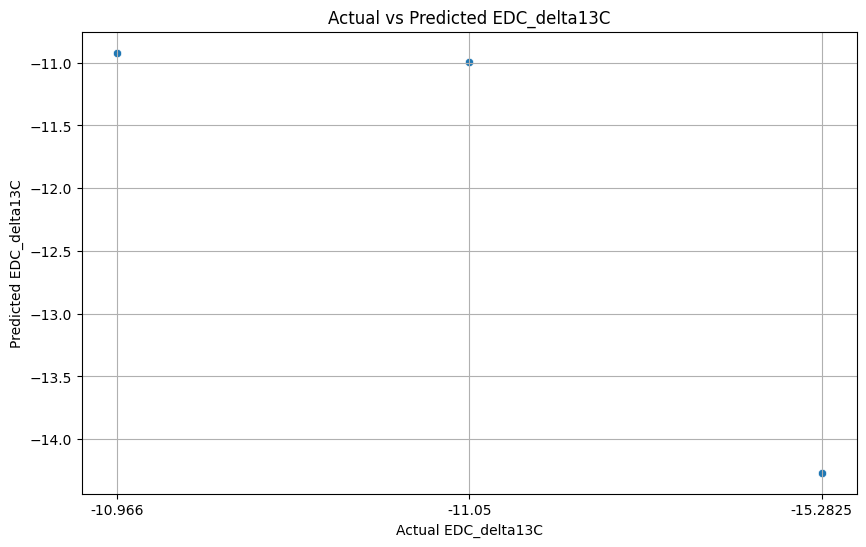

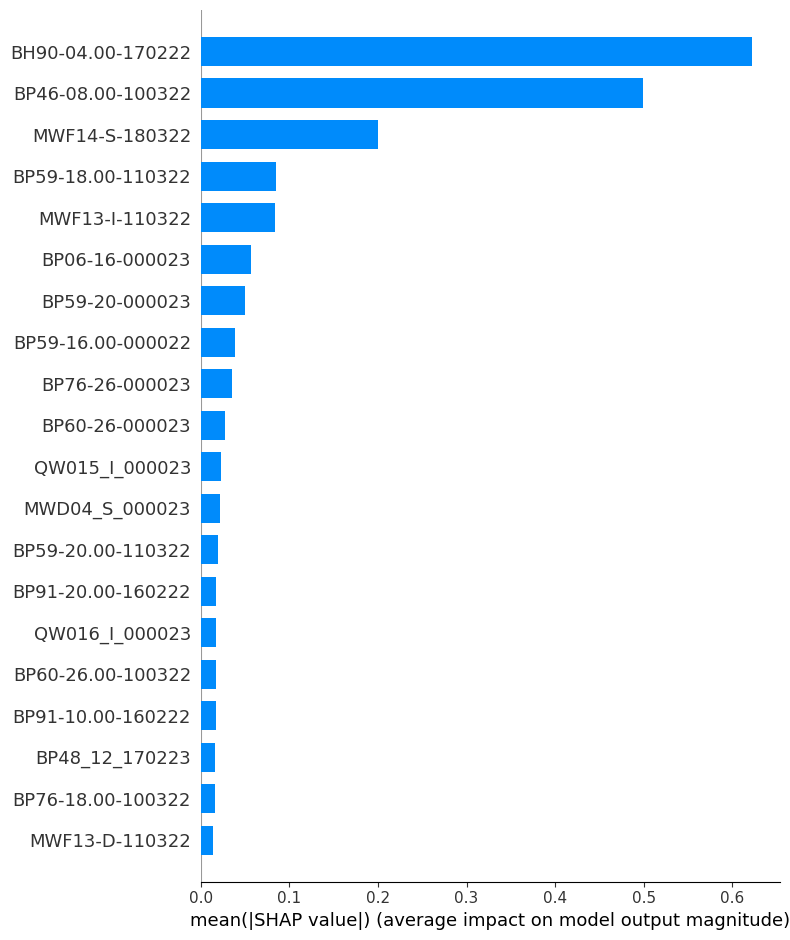

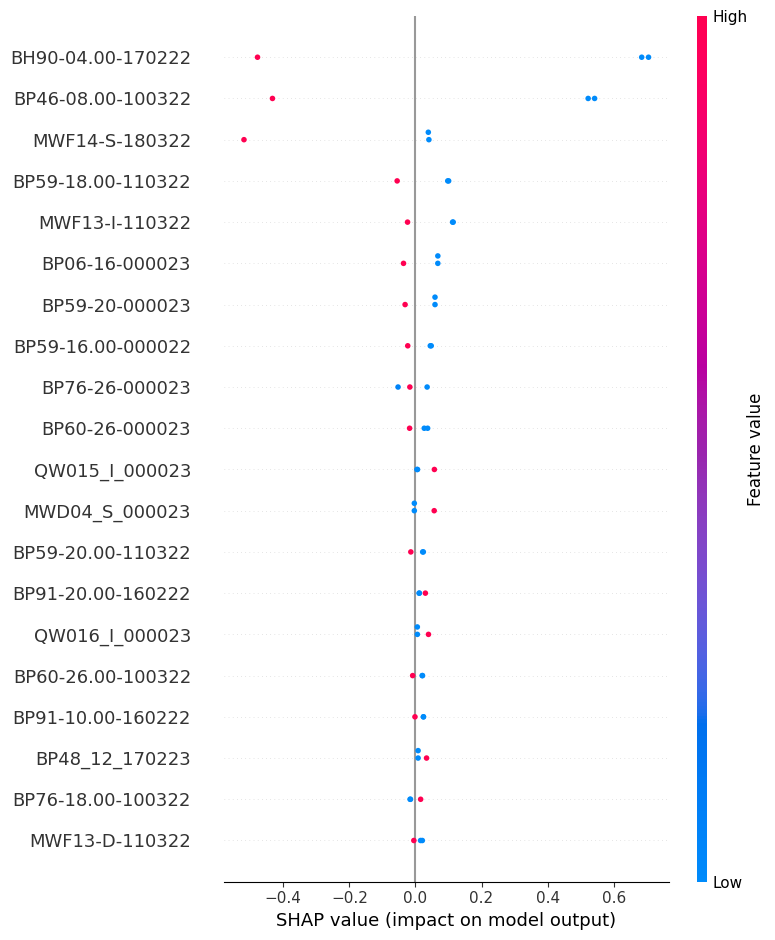

In [9]:
# Median filling, the data set is divided into 8/2.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Loading dataset.
data_file_path = './2022data and 2023data.txt'
data = pd.read_csv(data_file_path, delimiter='\t', header=0)
data.set_index(data.columns[0], inplace=True)

# Clean up X data.
if 'Depth' in data.index:
    data.drop('Depth', inplace=True)
if 'Unnamed: 47' in data.columns:
    data.drop('Unnamed: 47', axis=1, inplace=True)
data.index = data.index.str.replace('"', '').str.strip()

# The 12 compounds and microorganisms selected by features are used as the input of the model X.
top_compounds = [
    "EC", "Temp", "Trichloroethene", "cis-1,2-dichloroethene",
    "Sulphide", "Chloride", "1,2-dichloroethane", "pH",
    "Er", "Vinyl chloride", "Chloroform", "1,1,2-trichloroethane",
]
data = data.loc[top_compounds]

# Convert to numeric type and handle missing values.
data = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))
data.replace(0, pd.NA, inplace=True)

# Missing values ​​are filled with the sample mean.
#data_filled = data.T.fillna(data.mean(axis=1)).T
# The global mean fills the missing values.
#data_filled = data.T.fillna(data.mean().mean()).T
# Missing values ​​are filled with the median.
data_filled = data.apply(lambda x: x.fillna(x.median()), axis=1)

# Load the y value data and perform data cleaning.
y_data_path = './EDCPCE.csv'
y_data = pd.read_csv(y_data_path)
y_data = y_data.replace('ND', np.nan) 
y_data = y_data.dropna(subset=['EDC_delta13C'])
y = y_data['EDC_delta13C'].astype(float)  

# Sort y_data in ascending order by EDC_delta13C and select the 12 samples with the largest EDC_delta13C values.
y_data_sorted = y_data.sort_values(by='EDC_delta13C', ascending=False)
y_data_top_12 = y_data_sorted.tail(12)
y = y_data_top_12['EDC_delta13C']

# The dataset is divided into 70% for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(data_filled, y, test_size=0.2, random_state=42)

# Build a GBR/GBDT model with 100 estimators, a learning rate of 0.1, and a depth of 3.
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance on both training and test sets.
metrics = {
    "Mean Squared Error": mean_squared_error,
    "Root Mean Squared Error": lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    "Mean Absolute Error": mean_absolute_error,
    "R² Score": r2_score,
    "Explained Variance Score": explained_variance_score,
    "Median Absolute Error": median_absolute_error,
}
# Output the training set and test set evaluation results.
print("Training Performance:")
for name, metric in metrics.items():
    print(f"{name}: {metric(y_train, y_train_pred)}")

print("\nTesting Performance:")
for name, metric in metrics.items():
    print(f"{name}: {metric(y_test, y_test_pred)}")

# Visualization of results aids understanding.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual EDC_delta13C')
plt.ylabel('Predicted EDC_delta13C')
plt.title('Actual vs Predicted EDC_delta13C')
plt.grid(True)
plt.show()

# Using SHAP to increase model interpretability
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Visualizing SHAP Values
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)